In [104]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.datasets import load_breast_cancer
import sklearn.linear_model as linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.
import matplotlib.pyplot as plt
import missingno as msno
import sklearn.covariance as covar
import seaborn as sns

In [105]:
# iris_x,iris_y=load_breast_cancer(return_X_y=True)
# load_iris().keys()
x,y=load_breast_cancer(return_X_y=True)
x,y=pd.DataFrame(x),pd.DataFrame(y)
x

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<AxesSubplot:>

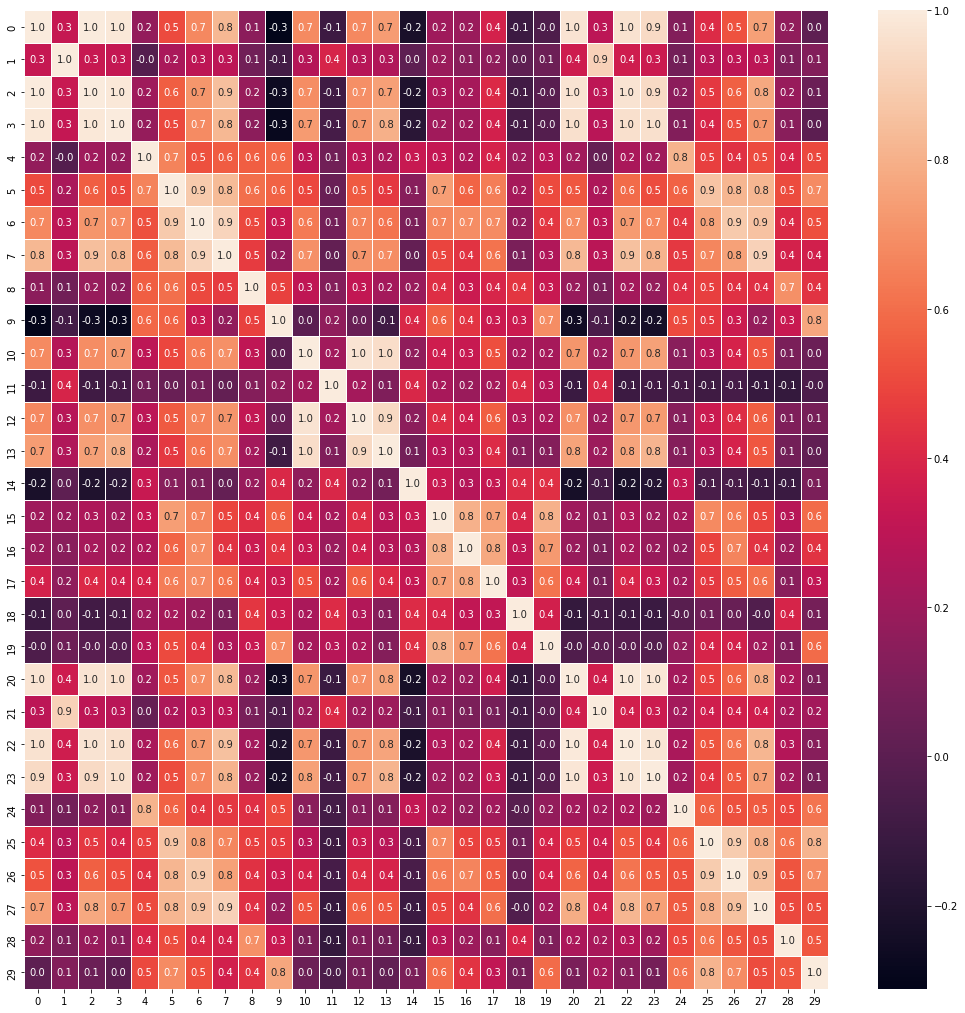

In [106]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [107]:
x_train, x_test, y_train, y_test=train_test_split(x,y, random_state=44)

In [108]:
ss=StandardScaler().fit(x_train)
x_train= ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [109]:
# model=linear_model.LogisticRegression(random_state=0).fit(x_train,np.ravel(y_train))
from sklearn.model_selection import cross_val_score,cross_validate,cross_val_predict
model=DecisionTreeClassifier(random_state=8).fit(x_train,y_train)
cvs=cross_val_score(model, x_test,y_test, cv=10)
# r2_score(y_test,model.predict(x_test))
# cross_validate(model, x_test,y_test, cv=10)
csp=cross_val_predict(model, x_test,y_test, cv=10)
cvs

array([0.93333333, 0.86666667, 1.        , 1.        , 0.92857143,
       0.78571429, 0.92857143, 1.        , 0.92857143, 0.85714286])

In [110]:
csp
r2_score(y_test,csp)

0.6550438596491228